In [1]:
import sys
import os
sys.path.append('../dbm_evaluation')
sys.path.append('../DeepView')

from map_evaluation import P_wrapper, Evaluator, NNinv_keras, NNinv_torch, MapBuilder


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
#import knn and decision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# import make blobs
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

from scipy.spatial import Delaunay
from scipy.interpolate import Rbf

# date
from datetime import datetime

from umap import UMAP
from sklearn.manifold import TSNE, MDS

from tqdm import tqdm

from ssnp import SSNP

from lamp import Pinv_ilamp
from NNinv import NNinv_torch
from rbf_inv import RBFinv
from multilateration import MDSinv
# date

c:\Users\yuwan\workspace\intrinsic_dim_DM\../DeepView\deepview\Stochastic_Embedding.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True)


In [2]:
# # import PCA
# from sklearn.decomposition import PCA

# blob = make_blobs(n_samples=1000, n_features=1000, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=1)
# pca = PCA(n_components=2)
# pca.fit(blob[0])
# pca_blob = pca.transform(blob[0])

# plt.scatter(pca_blob[:,0], pca_blob[:,1], c=blob[1], cmap='viridis')

In [3]:
# make my own color map
cmap = colors.ListedColormap(['#3322DD', 'gold' ], name='custom') # '#3322DD' '#EEDD22'
# cmap = 'jet'


(100, 3) (100,)


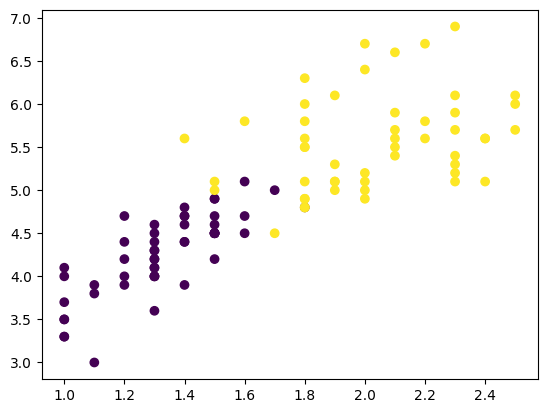

In [4]:
## Load iris data

iris = load_iris()
# ind = y != 0
ind = np.where(iris.target != 0)[0]

X = iris.data[ind, 1:]
y = iris.target[ind]
y = y - 1
print(X.shape, y.shape)
blob0 = [X, y]
# visualize
plt.scatter(X[:,2], X[:,1], c=y, cmap='viridis')

# X.shape

#### blob

# blob0 = make_blobs(n_samples=150, n_features=3, centers=2, cluster_std=0.8, random_state=42)
# # blob0 = make_blobs(n_samples=150, n_features=3, centers=5, cluster_std=1.2, random_state=6666)
# y = blob0[1]
# X = blob0[0]

C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3765452290.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pinot_clor_map = cm.get_cmap(CMAP)


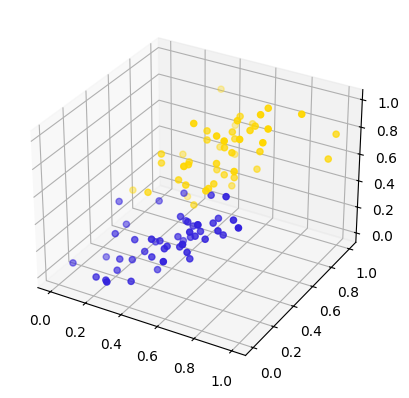

In [5]:
# %matplotlib widget

# plot the blobs in 3D"
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(111, projection='3d')
# ax.view_init() what is the default view? type help(ax.view_init)
# help(ax.view_init)
CMAP = cmap#"custom" #'PiYG'
pinot_clor_map = cm.get_cmap(CMAP)
ponit_clor = pinot_clor_map(y/y.max())

#####
lazy_scaler = MinMaxScaler()
blob0 = list(blob0)
blob0[0] = lazy_scaler.fit_transform(blob0[0])
#####

ax_3d.scatter(blob0[0][:,0], blob0[0][:,1], blob0[0][:,2], c=ponit_clor, )#cmap='tab10', )

In [6]:
class Simple_P_wrapper:
    def __init__(self, P, Pinv):
        self.P = P
        self.Pinv = Pinv
    def __call__(self, x):
        return self.P(x)
    def transform(self, x):
        return self.P.transform(x)
    def inverse_transform(self, x):
        return self.Pinv.transform(x)

    def fit(self, x, y=None, clf=None):
        # self.P.fit(x)
        self.X2d = self.P.fit_transform(x)
        self.Pinv.fit(self.X2d, x )
        return self

p = UMAP(n_components=2, random_state=43, n_neighbors=30, min_dist=0.9)
Pinv = NNinv_torch(dims=[2048]*4)
proj = Simple_P_wrapper(p, Pinv)

device:  cuda:0


In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(blob0[0])
# X = blob0[0]
y = blob0[1]

# NNinv_keras = 0
# NNinv_torch = 1
# deepview = 0
# ssnp = 0

# name_list = ['NNinv_keras', 'NNinv_torch', 'deepview', 'ssnp']
# #get the none zero name
# name_plot = [name_list[i] for i in [NNinv_keras, NNinv_torch, deepview, ssnp] if i != 0][0]

# # ssnp = SSNP(patience=5, opt='adam', bottleneck_activation='linear', verbose=0)
# proj = P_wrapper(NNinv_Keras=NNinv_keras, NNinv_Torch=NNinv_torch, deepview=deepview, ssnp=ssnp)
clf = linear_model.LogisticRegression()
# clf = SVC(probability=True)
# clf = KNeighborsClassifier()
# clf = DecisionTreeClassifier()
# clf = RandomForestClassifier()
P = MDS(n_components=2, random_state=0)

# dbm = P_wrapper(NNinv_Torch=1, deepview=0, ssnp=0, NNinv_Keras=0)
# ssnp = P_wrapper(NNinv_Keras=0, NNinv_Torch=0, deepview=0, ssnp=1)
DV = P_wrapper(NNinv_Keras=0, NNinv_Torch=0, deepview=1, ssnp=0)


# Pinv = NNinv_torch(dims=[2048]*4)

ilamp = Simple_P_wrapper(P, Pinv_ilamp())
dbm = Simple_P_wrapper(P, NNinv_torch())
ssnp = SSNP(bottleneck_activation='linear', )
mdsinv_rand = Simple_P_wrapper(P, MDSinv())
# mdsinv_near = Simple_P_wrapper(P, MDSinv(point_selection='nearest'))
rbf_inv = Simple_P_wrapper(P, RBFinv())

clf.fit(X, y)

DV.fit(X, y, clf, lam=0.65)
dbm.fit(X, y, clf)
ssnp.fit(X, y)
ilamp.fit(X, y, clf)
mdsinv_rand.fit(X, y, clf)
# mdsinv_near.fit(X, y, clf)
rbf_inv.fit(X, y, clf)


device:  cuda:0



100%|██████████| 100/100 [00:00<00:00, 2136.00it/s]

updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


transforming
fitting inverse


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done
fitting time:  7.063938617706299


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Early stopping at epoch 95

Epoch 1/100



C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 150ms/step - loss: 2.5614 - main_output_loss: 0.0000e+00 - decoder_output_loss: 0.6926 - main_output_accuracy: 0.4737 - decoder_output_accuracy: 0.2947 - val_loss: 2.5322 - val_main_output_loss: 0.0000e+00 - val_decoder_output_loss: 0.6901 - val_main_output_accuracy: 1.0000 - val_decoder_output_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 2.5182 - main_output_loss: 0.0000e+00 - decoder_output_loss: 0.6891 - main_output_accuracy: 0.4737 - decoder_output_accuracy: 0.3789 - val_loss: 2.4876 - val_main_output_loss: 0.0000e+00 - val_decoder_output_loss: 0.6848 - val_main_output_accuracy: 1.0000 - val_decoder_output_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 2.4729 - main_output_loss: 0.0000e+00 - decoder_output_loss: 0.6829 - main_output_accuracy: 0.4737 - decoder_output_accuracy: 0.3158 - val_loss: 2.4382 - val_main_output_loss: 0.0000e+00 - val_decoder_ou

C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning,

r:  (100, 100)
coefficients:  (100, 3)


In [8]:
# import tensorflow as tf
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)


# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# ! pip list | grep tensor

In [9]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
# map_builder = MapBuilder(clf, dbm, X, y, grid=100)
# ax_grad = map_builder.plot_gradient_map(ax=ax1)
# dv_map = map_builder.plot_prob_map(ax=ax2)
# plt.show()

4/4 [==============================] - 0s 3ms/step


[]

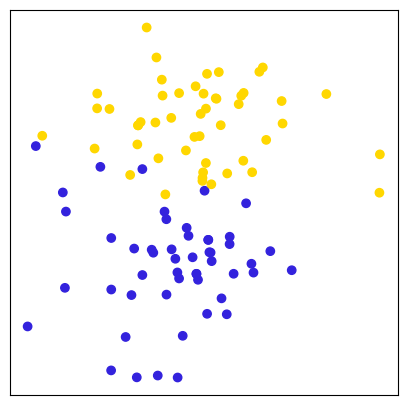

In [10]:
X_2d = ssnp.transform(blob0[0])
# scale the data to be between 0 and 1
# scaler2d = MinMaxScaler()
# X_2d = scaler2d.fit_transform(X_2d)


fig, ax = plt.subplots(figsize=(5,5) )
ax.scatter(X_2d[:,0], X_2d[:,1], c=ponit_clor)
# no ticks
ax.set_xticks([])
ax.set_yticks([])
# suqare aspect ratio`
# ax.set_aspect('equal')
# make directory if it doesn't exist
# if not os.path.exists('./figures/inlustrate_dbm'):
#     os.makedirs('./figures/inlustrate_dbm')
# fig.savefig('./figures/inlustrate_dbm/2d_1')

In [11]:
# %matplotlib widget
GRID = 20
# CMAP = 'tab10'


In [12]:
def plot_inverse_map(P_inv, GRID=GRID, clf=clf, ax=None, CMAP=CMAP, single_color=False):

    

    try:
        X_2d = P_inv.X2d
    except:
        X_2d = P_inv.transform(blob0[0])


    xx, yy = np.meshgrid(np.linspace(X_2d[:,0].min(), X_2d[:,0].max(), GRID), np.linspace(X_2d[:,1].min(), X_2d[:,1].max(), GRID))
    XY = np.c_[xx.ravel(), yy.ravel()]
    XY_3d = P_inv.inverse_transform(XY)
    XY_3d = scaler.inverse_transform(XY_3d)
    labels = clf.predict(XY_3d)
    ## grids with labels
    tab10 = cm.get_cmap(CMAP)
    labels_color = tab10(labels/labels.max())
    labels_color_2d = tab10(labels.reshape(GRID,GRID)/labels.max())
    # set alpha to 0.5
    labels_color_2d[:, : ,3] = 0.7
    # print(labels_color_2d.shape)
    # print(XY_3d[:,0].reshape(GRID,GRID).shape)
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    # visual_scaler = MinMaxScaler(0, GRID)

    # # ax_grid_dbm.scatter(XY_3d[:,0], XY_3d[:,1], XY_3d[:,2], c=labels_color[:], alpha=0.9, marker='+', cmap = 'tab10', s=100)
    # ax.scatter(blob0[0][:,0], blob0[0][:,1], blob0[0][:,2], c=blob0[1], cmap='tab10', ec='k', s=7, linewidth=0.1, alpha=0.75)

    # # ax_grid_dbm.plot_wireframe(XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), colors=labels_color, alpha=0.5,)
    # ax.plot_surface(
    #     XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), facecolors=labels_color_2d, #shade=False, #alpha=0.5, 
    #       linewidth=0.0, antialiased=False, rstride=1, cstride=1, )
    
    ########################### volume version plot##########
        # ax_grid_dbm.scatter(XY_3d[:,0], XY_3d[:,1], XY_3d[:,2], c=labels_color[:], alpha=0.9, marker='+', cmap = 'tab10', s=100)
    scatter2plot = blob0[0] * GRID
    ax.scatter(scatter2plot[:,0], scatter2plot[:,1], scatter2plot[:,2], c=blob0[1], cmap=CMAP, ec='k', s=7, linewidth=0.15, alpha=0.75)

    XY_3d *= GRID

    if not single_color:
        ax.plot_surface(
            XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), facecolors=labels_color_2d, #shade=False, #alpha=0.5, 
            linewidth=0.0, antialiased=False, rstride=1, cstride=1, )
    else:
        # single color
        single_clor = (0.8, 0.8, 0.8, 0.8)
        single_cloer_2d = np.ones((GRID, GRID, 4))
        single_cloer_2d[:, :, 0] = single_clor[0]
        single_cloer_2d[:, :, 1] = single_clor[1]
        single_cloer_2d[:, :, 2] = single_clor[2]
        single_cloer_2d[:, :, 3] = single_clor[3]

        ax.plot_surface(
            XY_3d[:,0].reshape(GRID,GRID), XY_3d[:,1].reshape(GRID,GRID), XY_3d[:,2].reshape(GRID,GRID), facecolors=single_cloer_2d, ec=None, #shade=False, #alpha=0.5, 
              linewidth=0.0, antialiased=False, rstride=1, cstride=1, )
    
    ######################

    # ratio = 0.1
    # ax.set_xlim(blob0[0][:,0].min()+ratio, blob0[0][:,0].max()*.9)
    # ax.set_ylim(blob0[0][:,1].min()+ratio, blob0[0][:,1].max()*.9)
    # ax.set_zlim(blob0[0][:,2].min()+ratio, blob0[0][:,2].max()*.9)


    return ax, XY_3d

def adjust_ax(ax):
    # # Make panes transparent
    # ax.xaxis.pane.fill = False # Left pane
    # ax.yaxis.pane.fill = False # Right pane
    # ax.zaxis.pane.fill = False # Right pane

    ### Remove grid lines
    # ax.grid(False)

    ## Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    # ## Transparent spines
    # ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    # ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    # ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # ## Transparent panes
    # ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ## No ticks
    # ax.set_xticks([]) 
    # ax.set_yticks([]) 
    # ax.set_zticks([])

    # backgroud color
    ax.set_facecolor((0.95, 0.95, 0.95, 0.0))
    return ax

# plot_inverse_map(dbm)
# plt.show()


def empty_ax(ax):
        # Make panes transparent
    ax.xaxis.pane.fill = False # Left pane
    ax.yaxis.pane.fill = False # Right pane
    ax.zaxis.pane.fill = False # Right pane

    ## Remove grid lines
    ax.grid(False)

    ## Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    ## Transparent spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    ## Transparent panes
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # No ticks
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

In [13]:
from skimage.measure import marching_cubes

def plot_volume2(clf, ax=None, grid=GRID, CMAP=CMAP, scatter=False, voxel=True, d_surface=False):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    xx, yy, zz = np.meshgrid(np.linspace(blob0[0][:,0].min(), blob0[0][:,0].max(), grid),
                                np.linspace(blob0[0][:,1].min(), blob0[0][:,1].max(), grid),
                                np.linspace(blob0[0][:,2].min(), blob0[0][:,2].max(), grid))
    
    XYZ = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    labels = clf.predict(XYZ)
    label_cube = labels.reshape(grid, grid, grid)

    # swap axis 
    label_cube = np.swapaxes(label_cube, 0, 1)
    

    cmap = cm.get_cmap(CMAP)
    labels_color_3d = cmap(label_cube/label_cube.max())
    # labels_color_3d = labels_color.reshape(grid, grid, grid, 4)
    labels_color_3d[:, :, :, 3] = 0.4
    voxels = np.ones((grid, grid, grid), dtype=bool)
    if voxel:
        ax.voxels(voxels, facecolors=labels_color_3d, linewidth=0.1, alpha=0.3, shade=False) #edgecolor='k', 

    # Use marching cubes to obtain the surface mesh
    verts, faces, normals, values = marching_cubes(label_cube, level=0.5)

    if d_surface:
        # Plotting the surface
        ax.plot_trisurf(verts[:, 0], verts[:, 1], verts[:, 2], triangles=faces, alpha=0.1, antialiased=True, color='#3322DD', edgecolor=None)

    if scatter:
        scatter2plot = blob0[0] * GRID
        ax.scatter(scatter2plot[:,0], scatter2plot[:,1], scatter2plot[:,2], c=blob0[1], cmap=CMAP, ec='k', s=7, linewidth=0.15, alpha=0.95)

    return ax, verts


def find_intersection(verts, XY_3d, tolerance=0.1):
    intersection_points = []
    for vertex in verts:
        distances = np.linalg.norm(XY_3d - vertex, axis=1)
        if np.any(distances < tolerance):
            intersection_points.append(vertex)
    return np.array(intersection_points)

In [14]:
# %matplotlib widget

C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)


Phi_new:  (400, 100)
(36, 3)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)


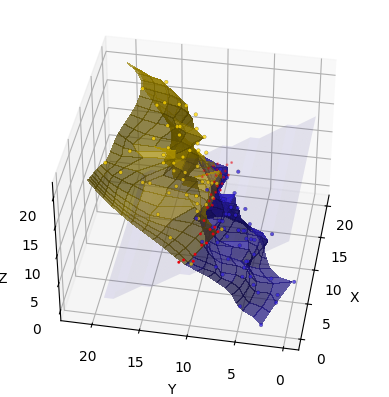

In [15]:
# %matplotlib widget
GRID=20
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax, verts  = plot_volume2(clf, ax=ax, grid=GRID, CMAP=CMAP, d_surface=True, voxel=False )
ax, DM_3d = plot_inverse_map(rbf_inv, GRID=GRID, clf=clf, ax=ax, CMAP=CMAP, single_color=False)

# # Find intersection points
intersection_points = find_intersection(verts, DM_3d, tolerance=0.8)
print(intersection_points.shape)
# # Plot the intersection points
ax.scatter(intersection_points[:, 0], intersection_points[:, 1], intersection_points[:, 2], c='r', s=5, label='Intersection', marker='.')

# # set camera position
# ax.view_init(25, 144)
# # ax.view_init(30, 30)

# set axis label
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(40, 190)

13/13 [==============================] - 0s 0s/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
100%|██████████| 100/100 [00:00<00:00, 1589.18it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\

Text(0.5, 0.92, 'DeepView')

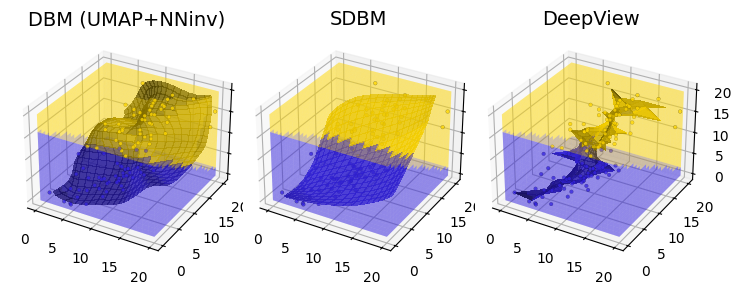

In [16]:
# build a fig with 3 3d-axes
fig = plt.figure(figsize=(9,3.5))
ax1 = fig.add_subplot(131, projection='3d', )
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
# white space between subplots
fig.subplots_adjust(wspace=0.0, hspace=0.0)

plot_inverse_map(dbm, ax=ax1)
plot_inverse_map(ssnp, ax=ax2)
plot_inverse_map(DV, ax=ax3)

# plot the volume
plot_volume2(clf, ax=ax1)
plot_volume2(clf, ax=ax2)
plot_volume2(clf, ax=ax3)



## set view angle
# viual_angle = (44, -44, 20)
# ax1.view_init(*viual_angle)
# ax2.view_init(*viual_angle)
# ax3.view_init(*viual_angle)

ax1.set_title('DBM (UMAP+NNinv)', fontsize=14)
ax2.set_title('SDBM', fontsize=14)
ax3.set_title('DeepView', fontsize=14)

# fig.savefig('./figures/3d_all.pdf', dpi=300, bbox_inches='tight')
# fig.savefig('../DecisionMap_Comapre_manuscript/figures/demo3d_new.pdf', dpi=300, bbox_inches='tight')

In [17]:
%matplotlib inline
classifiers = {
    'placeholder_clf': linear_model.LogisticRegression(),
    'Logistic Regression': linear_model.LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier([256,256,256]),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
}

## fit the models
for name, clf in classifiers.items():
    clf.fit(X, y)
    
dms = {
    'placeholder': P_wrapper(),
    'DBM(MDS+NNinv)': dbm,
    'SDBM': ssnp,
    'DeepView': DV,
    'MDS+iLAMP': ilamp,
    'MDS+RBF': rbf_inv,
    'MDS+iMDS': mdsinv_rand,
}



C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
## plot the figur, cols is number of dms+1, rows is number of classifiers+1
GRID = 20
d_surface = True

cols = len(dms) 
rows = len(classifiers) 

4/4 [==============================] - 0s 0s/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)


13/13 [==============================] - 0s 542us/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
100%|██████████| 100/100 [00:00<00:00, 1099.55it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
100%|██████████| 399/399 [00:00<?, ?it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` inst

Phi_new:  (400, 100)
400
(3,)
(3,)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20

13/13 [==============================] - 0s 1ms/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 100/100 [00:00<00:00, 2138.43it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


transforming
fitting inverse
done
fitting time:  0.834143877029419


100%|██████████| 100/100 [00:00<00:00, 1217.28it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 399/399 [00:00<00:00, 39796.62it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj

Phi_new:  (400, 100)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)


400
(3,)
(3,)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17:

13/13 [==============================] - 0s 1ms/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 100/100 [00:00<00:00, 374.18it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


transforming
fitting inverse
done
fitting time:  1.200237512588501


100%|██████████| 100/100 [00:00<00:00, 199.94it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 399/399 [00:00<?, ?it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

Phi_new:  (400, 100)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)


400
(3,)
(3,)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17:

13/13 [==============================] - 0s 1ms/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 100/100 [00:00<00:00, 135.58it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


transforming
fitting inverse
done
fitting time:  1.5529201030731201


100%|██████████| 100/100 [00:00<00:00, 100.04it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 399/399 [00:00<?, ?it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

Phi_new:  (400, 100)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)


400
(3,)
(3,)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17:

13/13 [==============================] - 0s 0s/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 100/100 [00:00<00:00, 394.30it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


transforming
fitting inverse
done
fitting time:  1.0512056350708008


100%|██████████| 100/100 [00:00<00:00, 200.72it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 399/399 [00:00<00:00, 199395.60it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj

Phi_new:  (400, 100)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)


400
(3,)
(3,)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17:

13/13 [==============================] - 0s 172us/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 100/100 [00:00<00:00, 2134.36it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


transforming
fitting inverse
done
fitting time:  0.8267374038696289


100%|██████████| 100/100 [00:00<00:00, 1162.98it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 399/399 [00:00<?, ?it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead

Phi_new:  (400, 100)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)


400
(3,)
(3,)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17:

13/13 [==============================] - 0s 0s/step


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 100/100 [00:00<00:00, 725.18it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


transforming
fitting inverse
done
fitting time:  0.9685943126678467


100%|██████████| 100/100 [00:00<00:00, 460.56it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)
100%|██████████| 399/399 [00:00<?, ?it/s]
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

Phi_new:  (400, 100)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)


400
(3,)
(3,)


C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\3600468317.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap(CMAP)
C:\Users\yuwan\AppData\Local\Temp\ipykernel_18508\48770605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(CMAP)


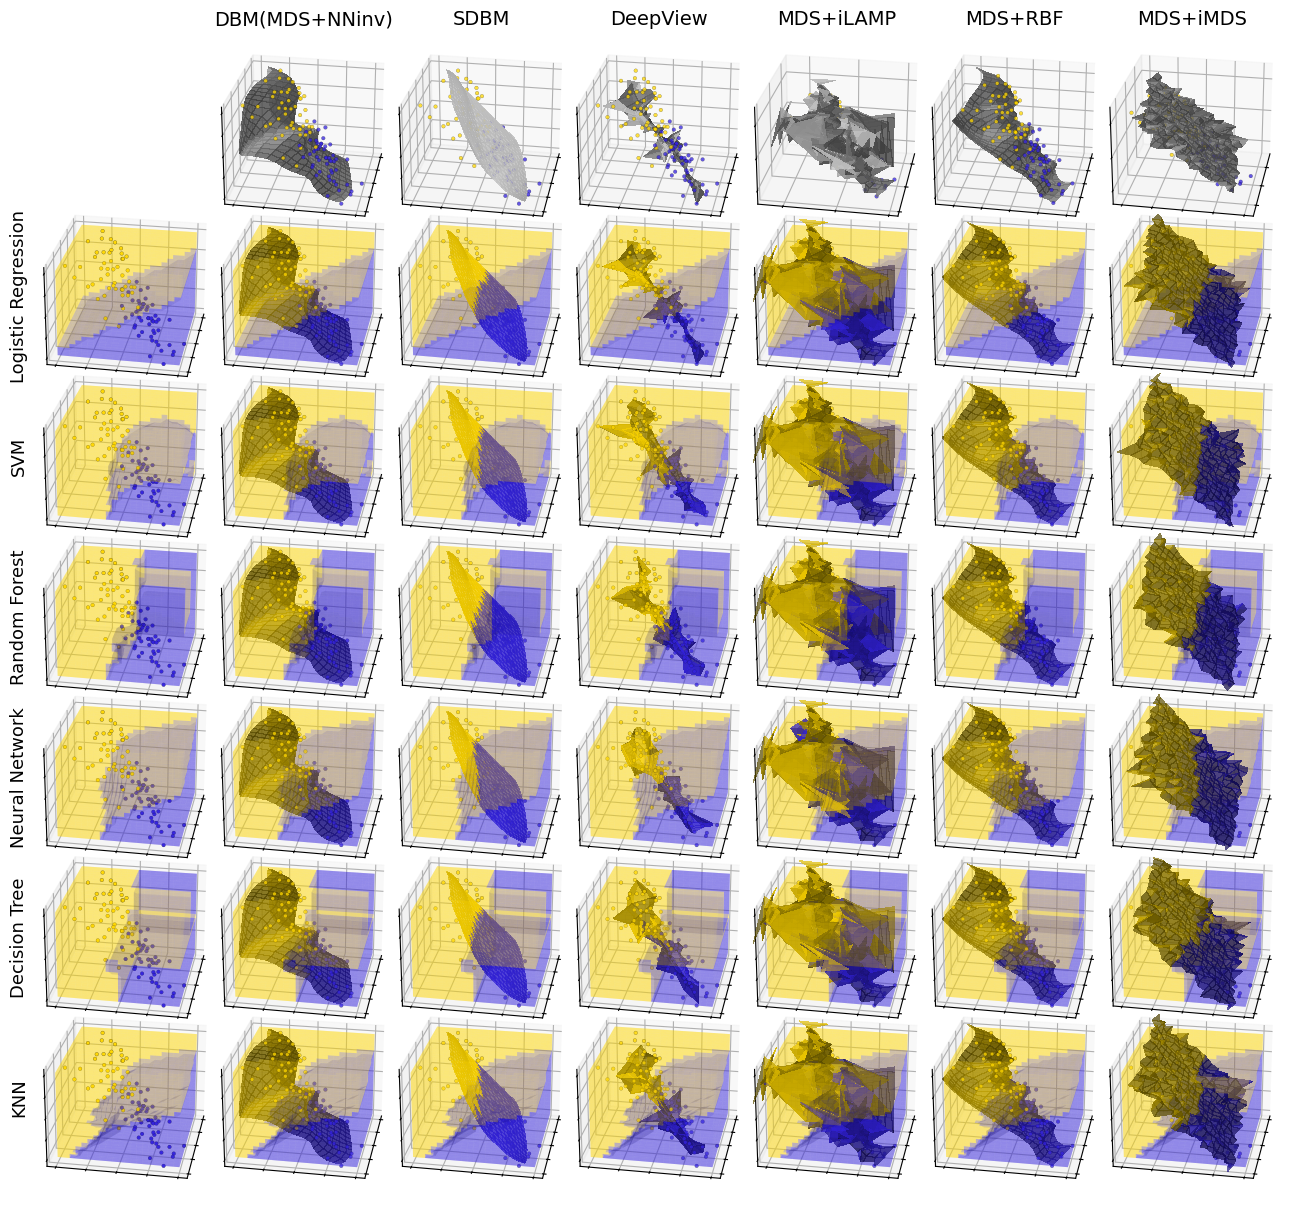

In [19]:


fig3d = plt.figure(figsize=(cols*3, rows*2.8))
fig3d.subplots_adjust(wspace=-0.56, hspace=-0.25)
fig3d.subplots_adjust(left=0, right=0.7, bottom=0, top=0.6)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    for j, (dm_name, dm) in enumerate(dms.items()):
        # print(i, j)
        ax = fig3d.add_subplot(rows, cols, i*cols+j+1, projection='3d')
        adjust_ax(ax)
        if i == 0 and j == 0:
            ### show nothing, leave it blank
            ax.set_axis_off()
            continue
        if i == 0:
            # 3d plot
            
            plot_inverse_map(dm, ax=ax, clf=clf, single_color=True, GRID=GRID)
            ax.set_title(dm_name, fontsize=14, pad=0)

        elif j == 0:
            plot_volume2(clf, ax=ax, grid=GRID, CMAP=CMAP, scatter=True, voxel=True, d_surface=d_surface)
            # a label at the left of each row
            ax.text2D(-0., 0.5, clf_name, fontsize=13, transform=ax.transAxes, rotation=90, va='center', ha='center')
        else:
            if dm_name == 'DeepView':
                dm = P_wrapper(NNinv_Keras=0, NNinv_Torch=0, deepview=1, ssnp=0)
                dm.fit(X, y, clf)
            plot_inverse_map(P_inv=dm, ax=ax, clf=clf, single_color=False, GRID=GRID)
            plot_volume2(clf, ax=ax, grid=GRID, CMAP=CMAP, scatter=False, voxel=True, d_surface=d_surface)

        adjust_ax(ax)
        # ax.view_init(25, 144)
        # ax.view_init(35, 35)
        # ax.view_init(7, 35)
        ax.view_init(40, 155)
        ax.view_init(12, 142)
        ax.view_init(35, 192)
        ax.view_init(25, 190)
# fig.savefig('./figures/3d_all.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [20]:
# fig3d.savefig('../paper/PAPER_intrinsic_dim/figures/dm3d_all.png', dpi=300, bbox_inches='tight')
# fig3d.savefig('../paper/PAPER_intrinsic_dim/figures/dm3d_all.pdf', bbox_inches='tight')
# fig3d.savefig('../paper/PAPER_intrinsic_dim/figures/dm3d_all.eps', bbox_inches='tight')
# fig3d.savefig('../paper/PAPER_intrinsic_dim/figures/dm3d_all_iris.png', dpi=300, bbox_inches='tight')
# fig3d.savefig('figures/dm3d_iLAMP_RBF_blob.png', dpi=300, bbox_inches='tight')

In [21]:
# # swap axis 0 and 1 in figure 3d

# fig3d = plt.figure(figsize=(cols*3, rows*3))
# fig3d.subplots_adjust(wspace=0.0, hspace=0.0)

# for i, (clf_name, clf) in enumerate(classifiers.items()):
#     for j, (dm_name, dm) in enumerate(dms.items()):
#         # print(i, j)
#         ax = fig.add_subplot(rows, cols, i*cols+j+1, projection='3d')
#         adjust_ax(ax)
#         if i == 0 and j == 0:
#             continue
#         if i == 0:
#             # 3d plot
            
#             plot_inverse_map(dm, ax=ax, clf=clf, single_color=True, GRID=GRID)
#             ax.set_title(dm_name, fontsize=14)

#         elif j == 0:
#             plot_volume2(clf, ax=ax, grid=GRID, CMAP=CMAP, scatter=True, voxel=True, d_surface=False)
#             # a label at the left of each row
#             ax.text2D(-0.1, 0.5, clf_name, fontsize=13, transform=ax.transAxes, rotation=90, va='center', ha='center')
#         else:
#             plot_inverse_map(dm, ax=ax, clf=clf, single_color=False, GRID=GRID)
#             plot_volume2(clf, ax=ax, grid=GRID, CMAP=CMAP, scatter=False, voxel=True, d_surface=False)

#         adjust_ax(ax)
#         # ax.view_init(25, 144)
#         # ax.view_init(35, 35)
# # fig.savefig('./figures/dm3d_all_horizontal.png', dpi=300, bbox_inches='tight')

calculating probability map
4/4 [==============================] - 0s 5ms/step
calculating probability map
313/313 [==============================] - 0s 674us/step


100%|██████████| 100/100 [00:00<00:00, 1910.87it/s]

updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


transforming
fitting inverse
done
fitting time:  0.7889113426208496
calculating probability map


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


calculating probability map


100%|██████████| 2000/2000 [00:00<00:00, 137441.56it/s]


calculating probability map
Phi_new:  (10000, 100)
calculating probability map
10000
(3,)
(3,)
calculating probability map
4/4 [==============================] - 0s 0s/step
calculating probability map
313/313 [==============================] - 0s 641us/step


100%|██████████| 100/100 [00:00<00:00, 429.84it/s]


updating matrices
(0,) (100, 100)
discr 0.0006148815155029297
(0,) (100, 100)
fitting mapper
transforming
fitting inverse
done
fitting time:  0.9993484020233154
calculating probability map


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


calculating probability map


100%|██████████| 2000/2000 [00:00<?, ?it/s]


calculating probability map
Phi_new:  (10000, 100)
calculating probability map
10000
(3,)
(3,)
calculating probability map
4/4 [==============================] - 0s 0s/step
calculating probability map
313/313 [==============================] - 0s 694us/step


100%|██████████| 100/100 [00:00<00:00, 136.37it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper
transforming
fitting inverse
done
fitting time:  1.500645637512207
calculating probability map


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


calculating probability map


100%|██████████| 2000/2000 [00:00<?, ?it/s]


calculating probability map
Phi_new:  (10000, 100)
calculating probability map
10000
(3,)
(3,)
calculating probability map
4/4 [==============================] - 0s 5ms/step
calculating probability map
313/313 [==============================] - 0s 691us/step


100%|██████████| 100/100 [00:00<00:00, 371.37it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper
transforming
fitting inverse
done
fitting time:  1.157219648361206
calculating probability map


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


calculating probability map


100%|██████████| 2000/2000 [00:00<00:00, 179328.06it/s]


calculating probability map
Phi_new:  (10000, 100)
calculating probability map
10000
(3,)
(3,)
calculating probability map
4/4 [==============================] - 0s 0s/step
calculating probability map
313/313 [==============================] - 0s 687us/step


100%|██████████| 100/100 [00:00<00:00, 1901.87it/s]

updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper


transforming
fitting inverse
done
fitting time:  0.8349485397338867
calculating probability map


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


calculating probability map


100%|██████████| 2000/2000 [00:00<00:00, 128003.91it/s]


calculating probability map
Phi_new:  (10000, 100)
calculating probability map
10000
(3,)
(3,)
calculating probability map
4/4 [==============================] - 0s 3ms/step
calculating probability map
313/313 [==============================] - 0s 719us/step


100%|██████████| 100/100 [00:00<00:00, 743.52it/s]


updating matrices
(0,) (100, 100)
discr 0.0
(0,) (100, 100)
fitting mapper
transforming
fitting inverse
done
fitting time:  0.9281697273254395
calculating probability map


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


calculating probability map


100%|██████████| 2000/2000 [00:00<00:00, 133287.91it/s]


calculating probability map
Phi_new:  (10000, 100)
calculating probability map
10000
(3,)
(3,)


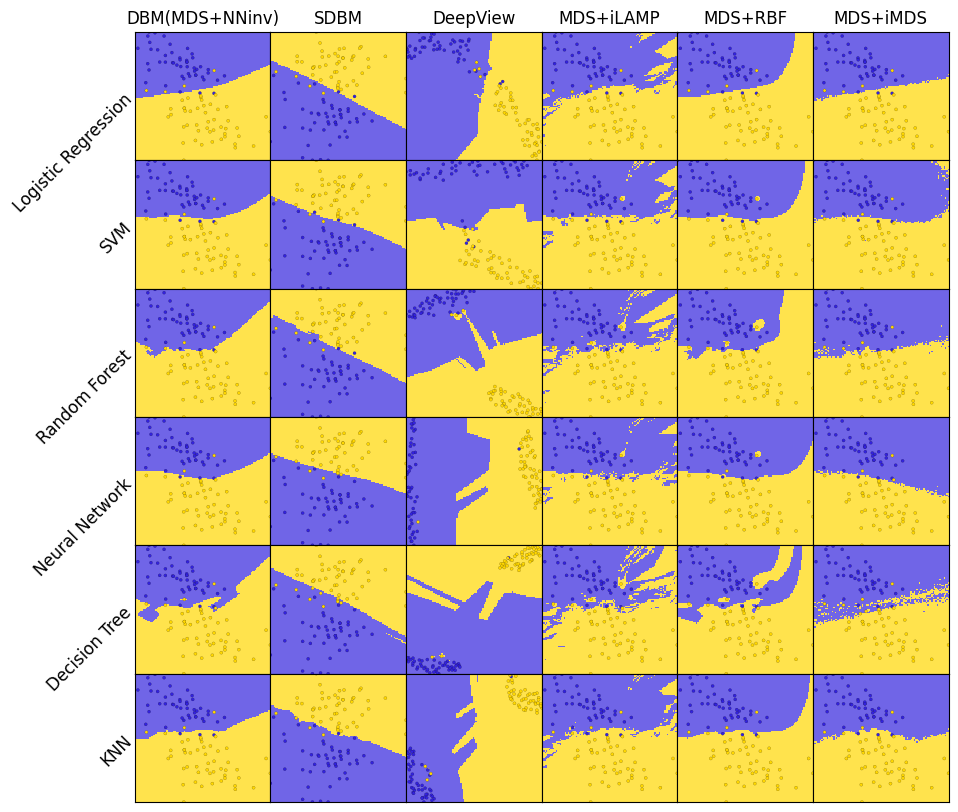

In [22]:
## 

fig, axes = plt.subplots(rows-1, cols-1, figsize=(cols*1.5, 10))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    for j, (dm_name, dm) in enumerate(dms.items()):
        if i == 0 or j == 0:
            continue
        ax = axes[i-1, j-1]
        # sqaure aspect ratio
        ax.set_aspect('equal')
        # legend false
        if dm_name == 'DeepView':
                dm = P_wrapper(NNinv_Keras=0, NNinv_Torch=0, deepview=1, ssnp=0)
                dm.fit(X, y, clf)
        dm_holder = MapBuilder(clf, dm, X, y, grid=100) ## it was 300
        ax = dm_holder.plot_prob_map(ax=ax, proba=False, cmap=CMAP, epsilo=0.7)
        dm_holder.plot_training_data(ax=ax, cmap=CMAP, ec='k', lw=0.1, size=20)
        ax.legend_ = None
        if i == 1:
            ax.set_title(dm_name, fontsize=12)
        if j == 1:
            ax.set_ylabel(clf_name, fontsize=12, rotation=45, ha='right', va='center')
# plt.tight_layout()

In [23]:
# fig.savefig('../paper/PAPER_intrinsic_dim/figures/dm2d_all.png', dpi=300, bbox_inches='tight')
# # fig.savefig('../paper/PAPER_intrinsic_dim/figures/dm2d_all_iris.png', dpi=300, bbox_inches='tight')
# fig.savefig('figures/dm2d_iLAMP_RBF_blob.png', dpi=300, bbox_inches='tight')